## Import Libraries

In [124]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from kan import KAN, KANLinear
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt

## Load Dataset

In [125]:
# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define a custom Dataset class
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32) 
        self.length = X.shape[0]

    def __getitem__(self, index):
        return self.X[index], self.y[index]

    def __len__(self):
        return self.length


## Create DataLoaders

In [126]:

train_dataset = CustomDataset(X_train, y_train)
test_dataset = CustomDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [127]:
model = KAN([30, 1, 2])

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)
# Define optimizer
optimizer = optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)
# Define learning rate scheduler
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.8)

val_losses = []
val_accuracies = []
# Define loss
criterion = nn.CrossEntropyLoss()
for epoch in range(16):
    # Train
    model.train()
    with tqdm(train_loader) as pbar:
        for i, (images, labels) in enumerate(pbar):
            images = images.to(device).float() 
            labels = labels.to(device).long()   
            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            accuracy = (output.argmax(dim=1) == labels).float().mean()
            pbar.set_postfix(loss=loss.item(), accuracy=accuracy.item(), lr=optimizer.param_groups[0]['lr'])

    # Validation
    model.eval()
    val_loss = 0
    val_accuracy = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device).float() 
            labels = labels.to(device).long()
            output = model(images)
            val_loss += criterion(output, labels).item()
            val_accuracy += (
                (output.argmax(dim=1) == labels).float().mean().item()
            )
    val_loss /= len(test_loader)
    val_losses.append(val_loss)
    val_accuracy /= len(test_loader)
    val_accuracies.append(val_accuracy)
    # Update learning rate
    scheduler.step()
    # print(model.layers)
    print(
        f"Epoch {epoch + 1}, Val Loss: {val_loss}, Val Accuracy: {val_accuracy}"
    )


cuda


100%|██████████| 29/29 [00:00<00:00, 187.04it/s, accuracy=0.857, loss=0.642, lr=0.001]

Epoch 1, Val Loss: 0.6601947396993637, Val Accuracy: 0.921875

100%|██████████| 29/29 [00:00<00:00, 195.77it/s, accuracy=1, loss=0.617, lr=0.0008]    


Epoch 2, Val Loss: 0.6346961930394173, Val Accuracy: 0.9453125


100%|██████████| 29/29 [00:00<00:00, 238.81it/s, accuracy=1, loss=0.591, lr=0.00064]    


Epoch 3, Val Loss: 0.6072755604982376, Val Accuracy: 0.9453125


100%|██████████| 29/29 [00:00<00:00, 253.11it/s, accuracy=0.857, loss=0.575, lr=0.000512]


Epoch 4, Val Loss: 0.5819791257381439, Val Accuracy: 0.9453125


100%|██████████| 29/29 [00:00<00:00, 234.04it/s, accuracy=1, loss=0.508, lr=0.00041]    


Epoch 5, Val Loss: 0.558842733502388, Val Accuracy: 0.9453125


100%|██████████| 29/29 [00:00<00:00, 254.39it/s, accuracy=0.857, loss=0.54, lr=0.000328] 


Epoch 6, Val Loss: 0.5390491038560867, Val Accuracy: 0.9453125


100%|██████████| 29/29 [00:00<00:00, 263.98it/s, accuracy=0.714, loss=0.547, lr=0.000262]


Epoch 7, Val Loss: 0.5232366174459457, Val Accuracy: 0.9453125


100%|██████████| 29/29 [00:00<00:00, 259.70it/s, accuracy=0.857, loss=0.54, lr=0.00021] 


Epoch 8, Val Loss: 0.5107937976717949, Val Accuracy: 0.9453125


100%|██████████| 29/29 [00:00<00:00, 263.01it/s, accuracy=0.857, loss=0.473, lr=0.000168]


Epoch 9, Val Loss: 0.5014027394354343, Val Accuracy: 0.9453125


100%|██████████| 29/29 [00:00<00:00, 270.03it/s, accuracy=1, loss=0.527, lr=0.000134]    


Epoch 10, Val Loss: 0.4941365383565426, Val Accuracy: 0.9453125


100%|██████████| 29/29 [00:00<00:00, 268.04it/s, accuracy=0.857, loss=0.439, lr=0.000107]


Epoch 11, Val Loss: 0.4889460876584053, Val Accuracy: 0.9453125


100%|██████████| 29/29 [00:00<00:00, 284.50it/s, accuracy=1, loss=0.421, lr=8.59e-5]


Epoch 12, Val Loss: 0.48475972935557365, Val Accuracy: 0.9453125


100%|██████████| 29/29 [00:00<00:00, 274.58it/s, accuracy=0.857, loss=0.368, lr=6.87e-5]


Epoch 13, Val Loss: 0.4816410057246685, Val Accuracy: 0.9453125


100%|██████████| 29/29 [00:00<00:00, 272.10it/s, accuracy=1, loss=0.459, lr=5.5e-5]   


Epoch 14, Val Loss: 0.47912048175930977, Val Accuracy: 0.9453125


100%|██████████| 29/29 [00:00<00:00, 266.56it/s, accuracy=0.857, loss=0.483, lr=4.4e-5]


Epoch 15, Val Loss: 0.4771742932498455, Val Accuracy: 0.9453125


100%|██████████| 29/29 [00:00<00:00, 273.98it/s, accuracy=1, loss=0.442, lr=3.52e-5]


Epoch 16, Val Loss: 0.4756956249475479, Val Accuracy: 0.9453125


ModuleList(
  (0-1): 2 x KANLinear(
    (base_activation): SiLU()
  )
)


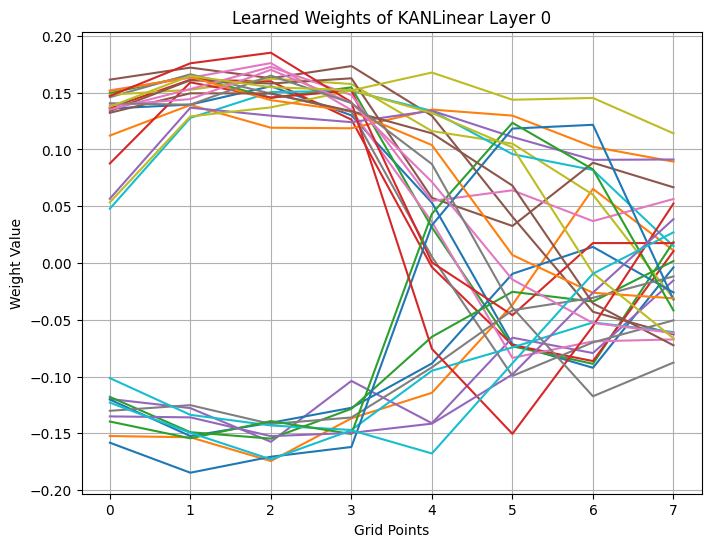

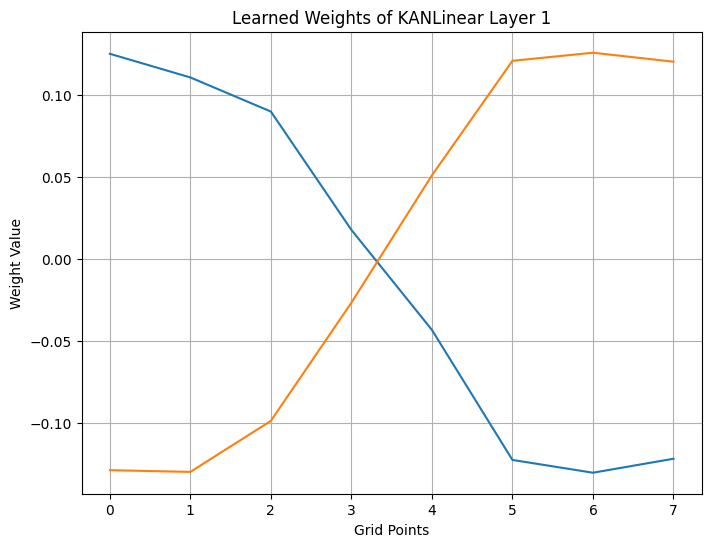

In [128]:
kan_linear_layers = []
print(model.layers)
for layer in model.layers:
    if isinstance(layer, KANLinear):
        kan_linear_layers.append(layer)

# Iterate through each KANLinear layer
for i, kan_linear_layer in enumerate(kan_linear_layers):
    # Get the learned weights
    spline_weight = kan_linear_layer.spline_weight.detach().cpu().numpy()

    # Plot the weights as lines
    plt.figure(figsize=(8, 6))
    grid_size = spline_weight.shape[2]  
    grid_values = np.arange(grid_size)
    for j in range(spline_weight.shape[0]):  
        for k in range(spline_weight.shape[1]):  
            plt.plot(grid_values, spline_weight[j, k], label=f'Output Neuron {j}, Input Neuron {k}')

    plt.title(f'Learned Weights of KANLinear Layer {i}')
    plt.xlabel('Grid Points')
    plt.ylabel('Weight Value')
    # plt.legend()
    plt.grid(True)
    plt.show()


In [129]:
model.num_parameters()

320

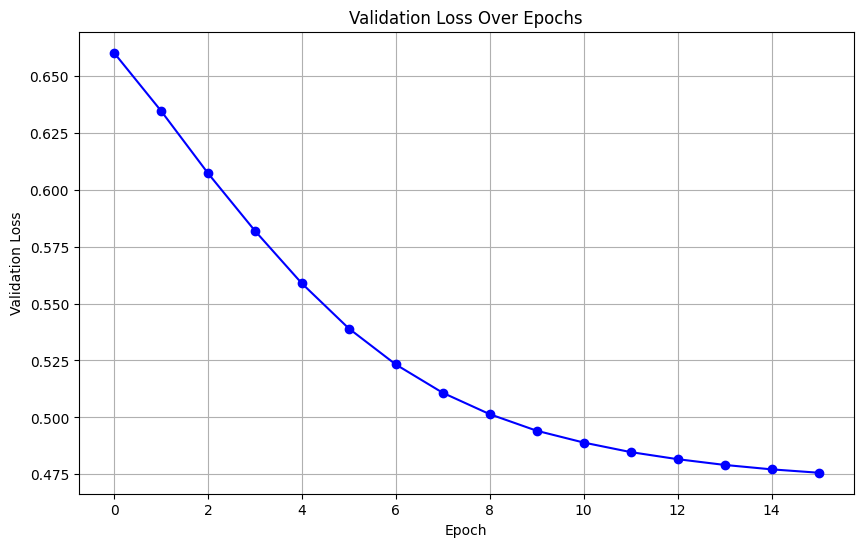

In [130]:
# Plot the validation losses
plt.figure(figsize=(10, 6))
plt.plot(val_losses, marker='o', color='b', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss Over Epochs')
plt.grid(True)
plt.show()


In [131]:
# Define the feedforward neural network class
class FFNN(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(FFNN, self).__init__()
        self.input_size = input_size
        self.hidden_layers = nn.ModuleList([nn.Linear(input_size, hidden_sizes[0])])
        for i in range(len(hidden_sizes) - 1):
            self.hidden_layers.extend([nn.Linear(hidden_sizes[i], hidden_sizes[i+1])])
        self.output_layer = nn.Linear(hidden_sizes[-1], output_size)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = x.view(-1, self.input_size) 
        for layer in self.hidden_layers:
            x = self.relu(layer(x))
        x = self.output_layer(x)
        x = self.sigmoid(x) 
        return x

input_size = X_train.shape[1] 
hidden_sizes = [16, 8] 
output_size = 2  

# Create the FFNN model
model = FFNN(input_size, hidden_sizes, output_size)

In [132]:

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

# Define optimizer
optimizer = optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)

# Define learning rate scheduler
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.8)

# Define loss
criterion = nn.CrossEntropyLoss()

val_losses = []
val_accuracies = []
for epoch in range(16):
    # Train
    model.train()
    with tqdm(train_loader) as pbar:
        for i, (images, labels) in enumerate(pbar):
            images = images.to(device).float()  
            labels = labels.to(device).long()
            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            accuracy = (output.argmax(dim=1) == labels).float().mean()
            pbar.set_postfix(loss=loss.item(), accuracy=accuracy.item(), lr=optimizer.param_groups[0]['lr'])

    # Validation
    model.eval()
    val_loss = 0
    val_accuracy = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device).float()
            labels = labels.to(device).long()
            output = model(images)
            val_loss += criterion(output, labels).item()
            val_accuracy += (
                (output.argmax(dim=1) == labels).float().mean().item()
            )
    val_loss /= len(test_loader)
    val_losses.append(val_loss)
    val_accuracy /= len(test_loader)
    val_accuracies.append(val_accuracy)
    # Update learning rate
    scheduler.step()

    print(
        f"Epoch {epoch + 1}, Val Loss: {val_loss}, Val Accuracy: {val_accuracy}"
    )


cuda


100%|██████████| 29/29 [00:00<00:00, 502.95it/s, accuracy=0.571, loss=0.666, lr=0.001]


Epoch 1, Val Loss: 0.6623273640871048, Val Accuracy: 0.6171875


100%|██████████| 29/29 [00:00<00:00, 538.03it/s, accuracy=0.571, loss=0.646, lr=0.0008]


Epoch 2, Val Loss: 0.6284163147211075, Val Accuracy: 0.6875


100%|██████████| 29/29 [00:00<00:00, 528.47it/s, accuracy=0.857, loss=0.558, lr=0.00064]

Epoch 3, Val Loss: 0.5880292728543282, Val Accuracy: 0.859375

100%|██████████| 29/29 [00:00<00:00, 500.16it/s, accuracy=0.857, loss=0.562, lr=0.000512]


Epoch 4, Val Loss: 0.5494812428951263, Val Accuracy: 0.9140625


100%|██████████| 29/29 [00:00<00:00, 495.67it/s, accuracy=0.714, loss=0.659, lr=0.00041]


Epoch 5, Val Loss: 0.5182000622153282, Val Accuracy: 0.9375


100%|██████████| 29/29 [00:00<00:00, 457.03it/s, accuracy=1, loss=0.469, lr=0.000328]


Epoch 6, Val Loss: 0.49326401203870773, Val Accuracy: 0.9453125


100%|██████████| 29/29 [00:00<00:00, 477.92it/s, accuracy=0.857, loss=0.543, lr=0.000262]


Epoch 7, Val Loss: 0.47418952360749245, Val Accuracy: 0.9453125


100%|██████████| 29/29 [00:00<00:00, 525.65it/s, accuracy=1, loss=0.422, lr=0.00021]


Epoch 8, Val Loss: 0.46057095378637314, Val Accuracy: 0.9609375


100%|██████████| 29/29 [00:00<00:00, 516.15it/s, accuracy=1, loss=0.427, lr=0.000168]


Epoch 9, Val Loss: 0.45071791112422943, Val Accuracy: 0.96875


100%|██████████| 29/29 [00:00<00:00, 519.96it/s, accuracy=0.714, loss=0.512, lr=0.000134]


Epoch 10, Val Loss: 0.44328322634100914, Val Accuracy: 0.96875


100%|██████████| 29/29 [00:00<00:00, 512.84it/s, accuracy=1, loss=0.46, lr=0.000107]


Epoch 11, Val Loss: 0.43789197131991386, Val Accuracy: 0.96875


100%|██████████| 29/29 [00:00<00:00, 341.28it/s, accuracy=1, loss=0.431, lr=8.59e-5]


Epoch 12, Val Loss: 0.43370262160897255, Val Accuracy: 0.96875


100%|██████████| 29/29 [00:00<00:00, 493.59it/s, accuracy=0.857, loss=0.491, lr=6.87e-5]


Epoch 13, Val Loss: 0.4305786080658436, Val Accuracy: 0.96875


100%|██████████| 29/29 [00:00<00:00, 512.36it/s, accuracy=1, loss=0.403, lr=5.5e-5]


Epoch 14, Val Loss: 0.4281131513416767, Val Accuracy: 0.96875


100%|██████████| 29/29 [00:00<00:00, 508.07it/s, accuracy=1, loss=0.4, lr=4.4e-5]


Epoch 15, Val Loss: 0.426266647875309, Val Accuracy: 0.96875


100%|██████████| 29/29 [00:00<00:00, 502.39it/s, accuracy=1, loss=0.42, lr=3.52e-5]

Epoch 16, Val Loss: 0.424762025475502, Val Accuracy: 0.96875


In [133]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# Calculate the number of parameters in the model
num_params = count_parameters(model)
print("Number of parameters in the model:", num_params)

Number of parameters in the model: 650


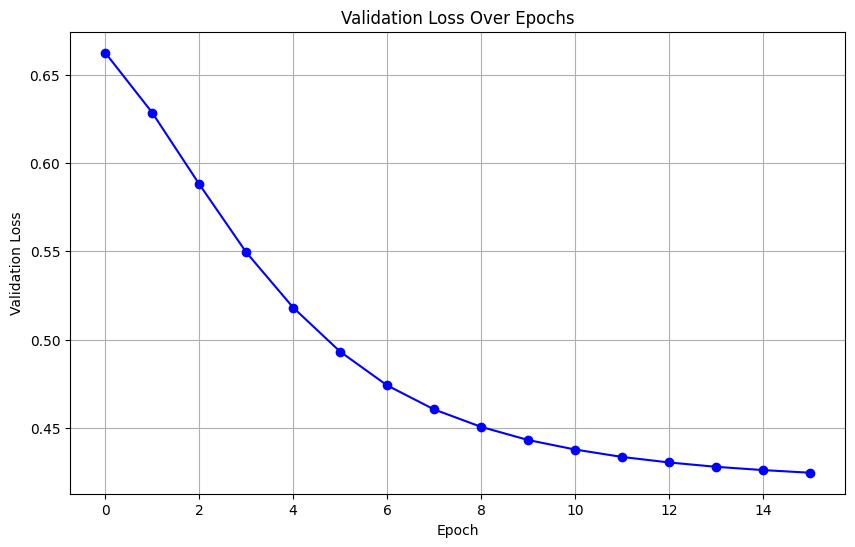

In [134]:
# Plot the validation losses
plt.figure(figsize=(10, 6))
plt.plot(val_losses, marker='o', color='b', linestyle='-')

plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss Over Epochs')
plt.grid(True)
plt.show()